In [39]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
#get and read dataset
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
dataset = pd.read_csv(url)
print("data imported successfully")
dataset

data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Desription about dataset

In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [42]:
dataset.shape

(25, 2)

In [43]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


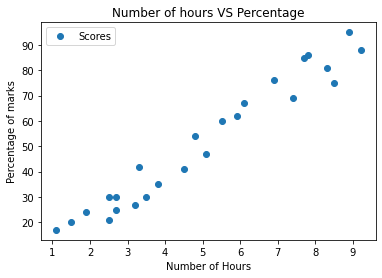

In [44]:
#plot dataset
dataset.plot(x='Hours', y = 'Scores', style='o')
plt.title('Number of hours VS Percentage')
plt.xlabel("Number of Hours")
plt.ylabel("Percentage of marks")
plt.show()

# Data cleaning

<AxesSubplot:>

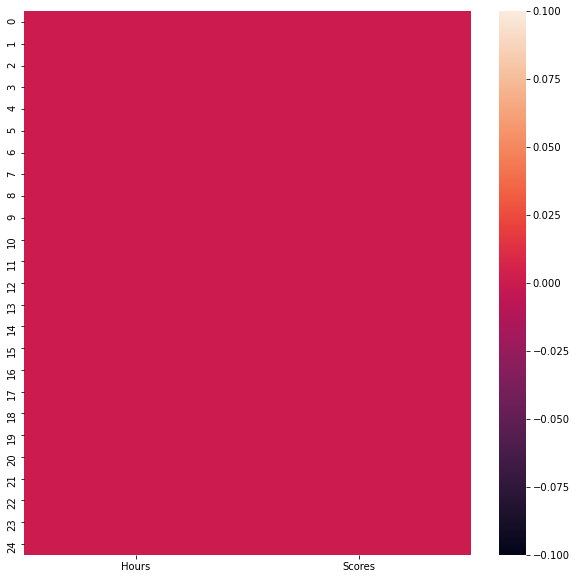

In [45]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(dataset.isnull())
#show number of missing data

In [46]:
dataset.isnull().sum()
#no missing data

Hours     0
Scores    0
dtype: int64

In [47]:
dataset.mean()

Hours      5.012
Scores    51.480
dtype: float64

#values 

In [48]:
#make note of the location of the points
x = dataset.iloc[:,0].values
y = dataset.iloc[:,1].values

In [49]:
x, y 

(array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
        3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

In [50]:
x = dataset[['Hours']].values
y = dataset[['Scores']].values

In [51]:
x,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([[21],
        [47],
        [27],
        [75],
        [30],
        [20],
        [88],
        [60],
        [81],
        [25],
        [85],
        [62],
        [41],
        [42],
        [17],
        [95],
        [30],
        [24],
        [67],
        [69],
        [30],
        [54],
        [35],
        [76],
        [86]], dtype=int64))

# Spliting training and testing set

In [52]:
#make training and testingmodel
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [53]:
x_train.shape

(20, 1)

In [54]:
y_train.shape

(20, 1)

In [55]:
x_test.shape

(5, 1)

In [56]:
y_test.shape

(5, 1)

# Select a model and train it

In [57]:
#y=mx+c

In [58]:
#use linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
print("Trainig complete")

Trainig complete


In [59]:
regressor.coef_

array([[9.91065648]])

In [60]:
regressor.intercept_

array([2.01816004])

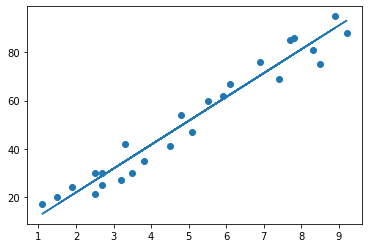

In [61]:
#plot 
line = regressor.coef_*x + regressor.intercept_
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [62]:
regressor.predict

<bound method LinearModel.predict of LinearRegression()>

In [63]:
print(x_test)
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [64]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [65]:
chart = {'Actual': list(y_test), 'Predicted': list(y_pred)}
df = pd.DataFrame(chart)
print(df)

  Actual             Predicted
0   [20]  [16.884144762398037]
1   [27]   [33.73226077948984]
2   [69]   [75.35701799818723]
3   [30]  [26.794801243040276]
4   [62]  [60.491033277223885]


In [66]:
score_pred = np.array([9.25])
score_pred = score_pred.reshape(-1,1)
predict = regressor.predict(score_pred)
print("No of hours = {}".format(9.25))
print("Predicted scor = {}".format(predict[0]))

No of hours = 9.25
Predicted scor = [93.69173249]


In [67]:
from sklearn import metrics
print('Mean absolute error: ', metrics.mean_absolute_error(y_test,y_pred))

Mean absolute error:  4.183859899002975


In [69]:
pd.DataFrame(np.c_[x_test,y_test,y_pred], 
            columns = ['No of Hours', 'actual score','Predicted socre'])

,No of Hours,actual score,Predicted socre
0,1.5,20.0,16.884145
1,3.2,27.0,33.732261
2,7.4,69.0,75.357018
3,2.5,30.0,26.794801
4,5.9,62.0,60.491033


In [70]:
regressor.score(x_test,y_test)
#accuracy

0.9454906892105356

<function matplotlib.pyplot.show(close=None, block=None)>

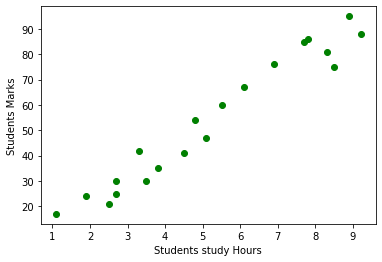

In [71]:
plt.scatter(x_train,y_train,color="g") # tranning dataset
plt.xlabel("Students study Hours")
plt.ylabel("Students Marks")
plt.show

Text(0, 0.5, 'Students Marks')

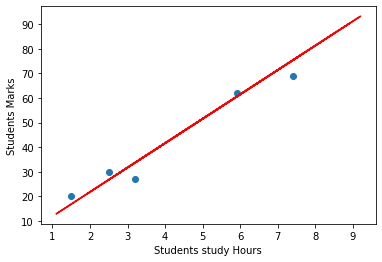

In [73]:
plt.scatter(x_test,y_test)     # testing dataset    
plt.plot(x_train,regressor.predict(x_train), color="r")   # line missing points show our 5% accuracy
plt.xlabel("Students study Hours")
plt.ylabel("Students Marks")